In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,hadoop_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,Vera Institute of Justice\r\n,NY,1,60,1,0,0,0,1,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,Visiting Nurse Service of New York\r\n,NY,1,128,0,0,0,0,0,1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,Squarespace\r\n,NY,1,18,1,0,0,0,0,1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,Celerity\r\n,NY,0,19,0,0,0,0,1,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,FanDuel\r\n,NY,1,12,1,0,0,0,0,1


In [4]:
df.columns



Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'hadoop_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
df['Job Title']

0       Data Analyst, Center on Immigration and Justic...
1                                    Quality Data Analyst
2       Senior Data Analyst, Insights & Analytics Team...
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
8684                                    AWS Data Engineer
8685                                Data Analyst â Junior
8686                     Security Analytics Data Engineer
8687                     Security Analytics Data Engineer
8688    Patient Safety Physician or Safety Scientist -...
Name: Job Title, Length: 8689, dtype: object

In [6]:
def simplify_title(job_title):
    if 'data scientist' in job_title.lower():
        return 'data scientist'
    elif 'data engineer' in job_title.lower():
        return 'data engineer'
    elif 'analyst' in job_title.lower():
        return 'analyst'
    elif 'machine learning' in job_title.lower():
        return 'mle'
    elif 'manager' in job_title.lower():
        return 'manager'
    elif 'director' in job_title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(job_title):
    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'lead' in job_title.lower() or 'principal' in job_title.lower():
        return 'senior'
    elif 'jr' in job_title.lower() or 'jr.' in job_title.lower() or 'junior' in job_title.lower() or 'associate' in job_title.lower():
        return 'junior'
    else:
        return 'na'
        

In [7]:
df['job_simplified'] = df['Job Title'].apply(simplify_title)

In [8]:
df.job_simplified.value_counts()

analyst           3121
na                2269
data engineer     1968
data scientist    1030
mle                174
manager             89
director            38
Name: job_simplified, dtype: int64

In [9]:
#seniority parsing
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        6525
senior    1926
junior     238
Name: seniority, dtype: int64

In [10]:
#Fixing Arapahoe county and United Kingdom
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'CO')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'united kingdom' else 'na')
df.job_state.value_counts()

TX    2647
CA    2295
NY     845
IL     727
PA     611
AZ     592
FL     224
OH     212
NJ     142
CO      96
NC      90
WA      53
VA      48
DE      37
UT      33
IN      23
GA       4
na       4
SC       3
KS       3
Name: job_state, dtype: int64

In [11]:
#job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       7132
1       4732
2       4715
3       5294
4       3418
        ... 
8684    2077
8685    1495
8686    4692
8687    3541
8688    2929
Name: desc_len, Length: 8689, dtype: int64

In [12]:
#competitor
df['num_of_Comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_of_Comp

0       0
1       0
2       1
3       0
4       1
       ..
8684    0
8685    0
8686    0
8687    0
8688    1
Name: num_of_Comp, Length: 8689, dtype: int64

In [13]:
#hourly wage to salary
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly ==1 else x.max_salary, axis=1)
df[df.Hourly == 1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
5465,1,68,106
5466,1,68,106
5467,1,68,106
5468,1,68,106
5469,1,68,106
5470,1,68,106
5471,1,68,106
6075,1,20,52
6076,1,20,52
6077,1,20,52


In [14]:
df['company_txt'] = df.company_txt.apply(lambda x : str(x))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r\n',''))
df.company_txt

0                Vera Institute of Justice
1       Visiting Nurse Service of New York
2                              Squarespace
3                                 Celerity
4                                  FanDuel
                       ...                
8684                  Tachyon Technologies
8685      Staffigo Technical Services, LLC
8686                        PDS Tech, Inc.
8687            Data Resource Technologies
8688                                   UCB
Name: company_txt, Length: 8689, dtype: object

In [15]:
df.describe()

,Rating,Founded,Hourly,min_salary,max_salary,avg_salary,same_state,age,python_yn,hadoop_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_of_Comp
count,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000
mean,3.279491,1474.368742,0.002417,73.426516,119.806307,96.547301,0.299229,32.557832,0.469674,0.160087,0.004258,0.209460,0.246058,0.468523,3430.223616,0.760272
std,1.585387,862.219826,0.049105,31.491875,43.590588,36.528287,0.457947,46.271378,0.499108,0.366708,0.065120,0.406947,0.430738,0.499037,1960.310032,1.250398
min,-1.000000,-1.000000,0.000000,12.000000,38.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,3.200000,-1.000000,0.000000,49.000000,87.000000,68.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2025.000000,0.000000
50%,3.700000,1983.000000,0.000000,69.000000,111.000000,91.500000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3196.000000,0.000000
75%,4.100000,2002.000000,0.000000,93.000000,149.000000,121.500000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4481.000000,2.000000
max,5.000000,2020.000000,1.000000,200.000000,281.000000,225.000000,1.000000,396.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20051.000000,4.000000


<AxesSubplot:>

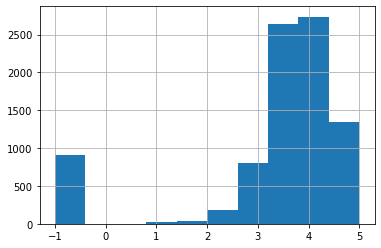

In [16]:
df.Rating.hist()

<AxesSubplot:>

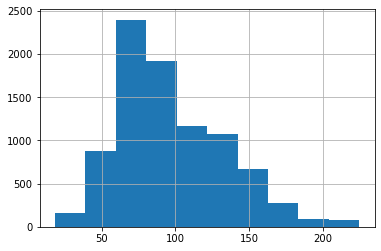

In [17]:
df.avg_salary.hist()

<AxesSubplot:>

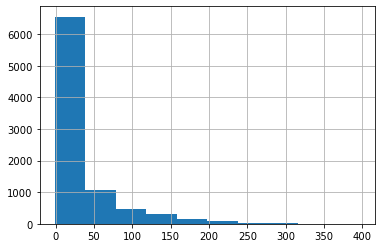

In [18]:
df.age.hist()

<AxesSubplot:>

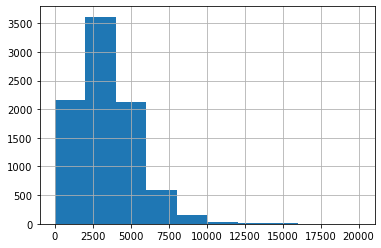

In [19]:
df.desc_len.hist()

<AxesSubplot:>

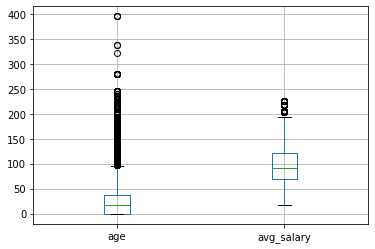

In [20]:
df.boxplot(column = ['age', 'avg_salary'])

In [21]:
df[['age','avg_salary','Rating','desc_len','num_of_Comp']].corr()

,age,avg_salary,Rating,desc_len,num_of_Comp
age,1.000000,-0.021051,0.189130,0.332094,0.262146
avg_salary,-0.021051,1.000000,0.053994,0.021201,0.081568
Rating,0.189130,0.053994,1.000000,0.064691,0.185782
desc_len,0.332094,0.021201,0.064691,1.000000,0.193930
num_of_Comp,0.262146,0.081568,0.185782,0.193930,1.000000


<AxesSubplot:>

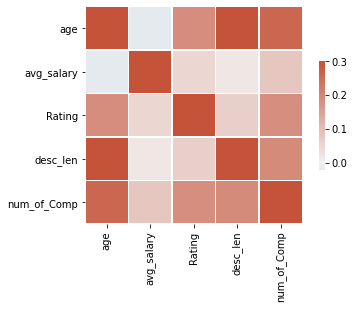

In [22]:
cmap = sns.diverging_palette(220,19,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_of_Comp']].corr(), vmax=.3, center = 0, cmap=cmap,
            square=True,linewidth=.5,cbar_kws={"shrink":.5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'hadoop_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simplified', 'seniority', 'desc_len', 'num_of_Comp'],
      dtype='object')

In [24]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
    'job_state', 'same_state', 'python_yn','hadoop_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 
    'excel_yn','job_simplified', 'seniority']]

graph of  Location total =  334


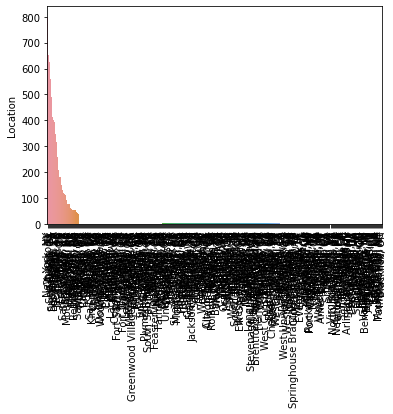

graph of  Headquarters total =  816


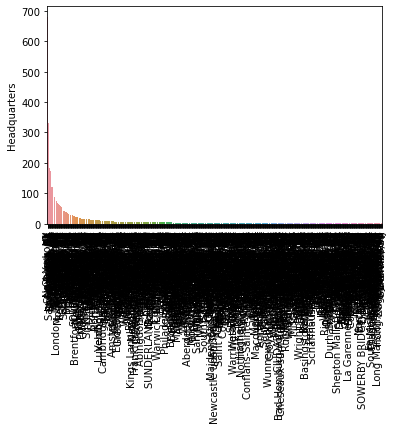

graph of  Size total =  9


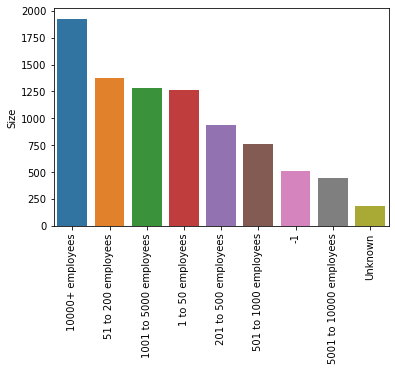

graph of  Type of ownership total =  15


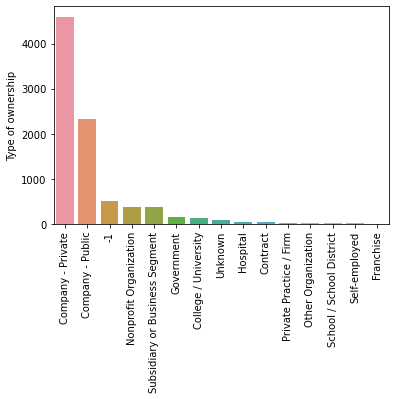

graph of  Industry total =  109


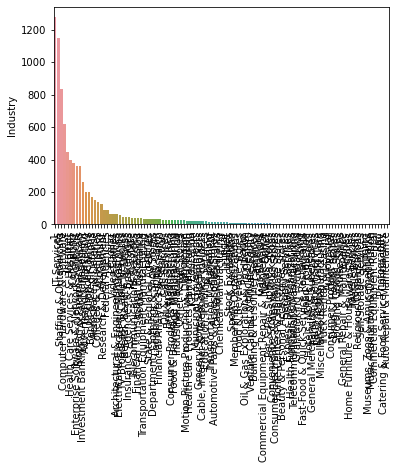

graph of  Sector total =  26


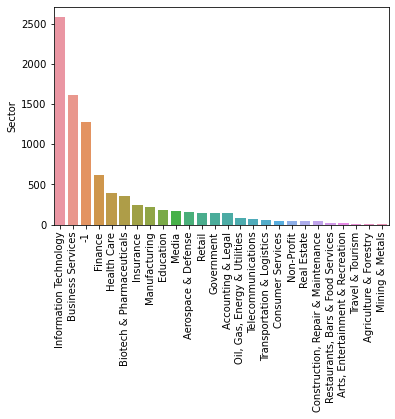

graph of  Revenue total =  14


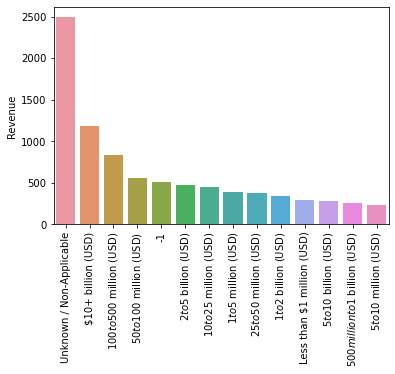

graph of  company_txt total =  3539


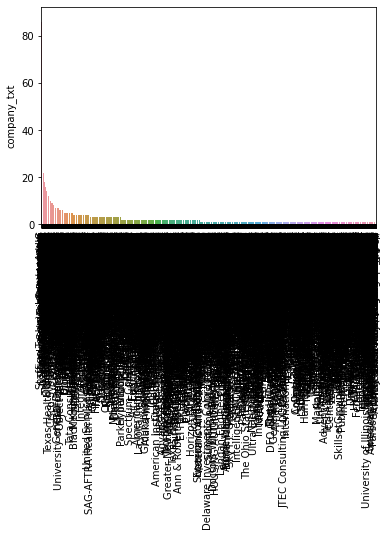

graph of  job_state total =  20


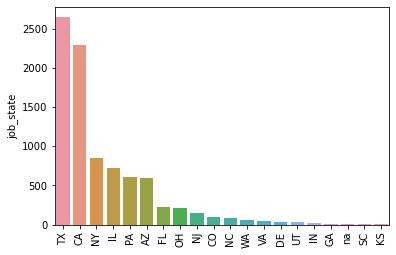

graph of  same_state total =  2


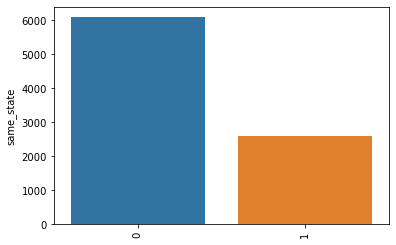

graph of  python_yn total =  2


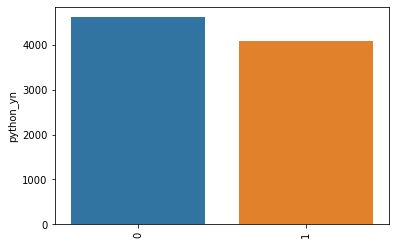

graph of  hadoop_yn total =  2


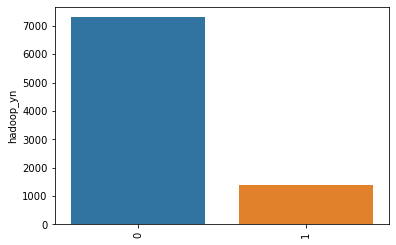

graph of  rstudio_yn total =  2


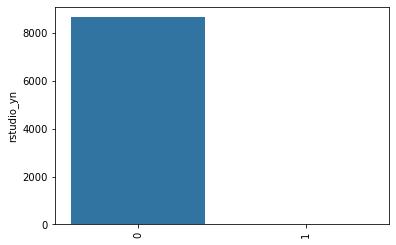

graph of  spark_yn total =  2


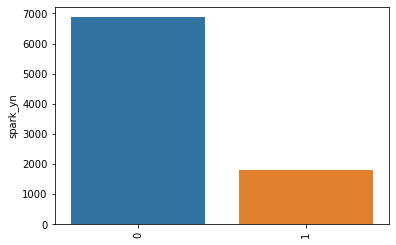

graph of  aws_yn total =  2


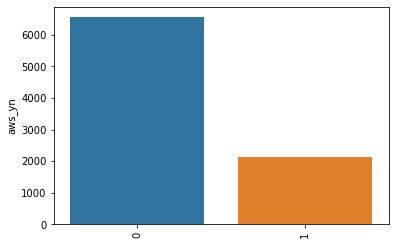

graph of  excel_yn total =  2


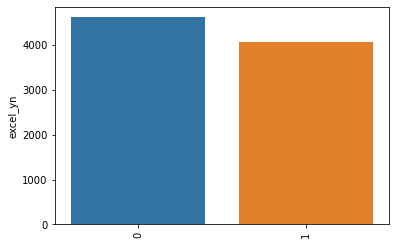

graph of  job_simplified total =  7


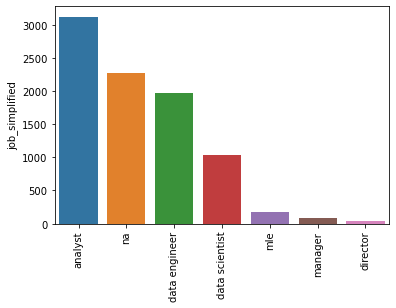

graph of  seniority total =  3


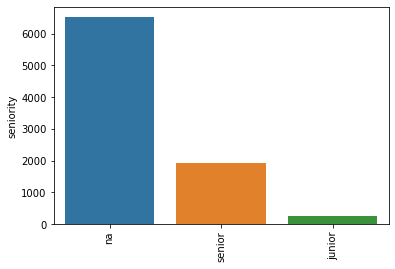

In [25]:
for var in df_cat.columns:
    num_of_cat = df_cat[var].value_counts()
    print("graph of ", var, "total = ", len(num_of_cat))
    chart = sns.barplot(x=num_of_cat.index, y=num_of_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph of  Location total =  20


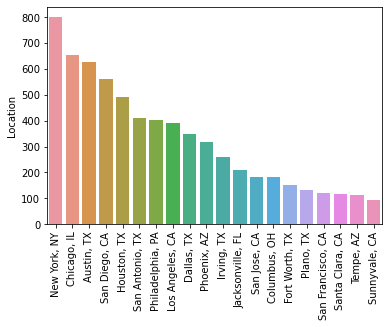

graph of  Headquarters total =  20


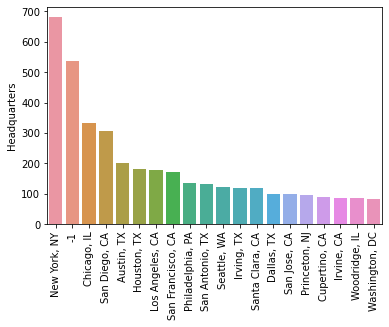

graph of  Industry total =  20


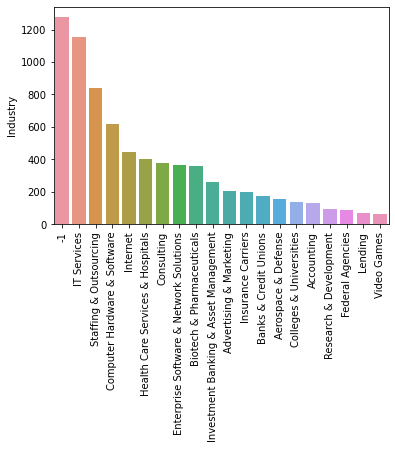

graph of  company_txt total =  20


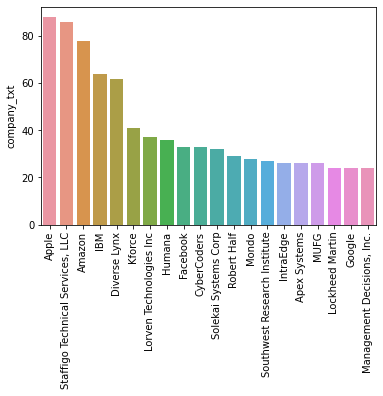

In [26]:
for var in df_cat[['Location','Headquarters','Industry', 'company_txt']].columns:
    num_of_cat = df_cat[var].value_counts()[:20]
    print("graph of ", var, "total = ", len(num_of_cat))
    chart = sns.barplot(x=num_of_cat.index, y=num_of_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'hadoop_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simplified', 'seniority', 'desc_len', 'num_of_Comp'],
      dtype='object')

In [28]:
pd.pivot_table(df, index = ['job_simplified','seniority'], values = 'avg_salary')

avg_salary
job_simplified seniority            
analyst        junior      72.576613
               na          80.952993
               senior      80.115200
data engineer  junior     109.354167
               na         103.611807
               senior     103.457944
data scientist junior     107.892857
               na         122.077941
               senior     125.465774
director       junior      70.500000
               na          97.233333
               senior     117.166667
manager        junior     177.500000
               na         109.237179
               senior     109.650000
mle            na         122.479730
               senior     100.557692
na             junior      97.945205
               na          97.451205
               senior     100.880808

In [29]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,119.335294
DE,102.702703
NY,101.406509
na,99.625000
AZ,93.609797
PA,90.243044
IL,88.330812
TX,87.812240
NJ,87.369718


In [30]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state',ascending=True)

avg_salary
job_state job_simplified            
AZ        analyst                176
          data engineer          177
          data scientist          50
          director                 2
          manager                 11
          mle                      8
          na                     168
CA        na                     580
          mle                     73
          manager                 27
          data engineer          464
          data scientist         311
          analyst                831
          director                 9
CO        data engineer            1
          analyst                 95
DE        data scientist           5
          na                       5
          analyst                 11
          data engineer           16
FL        analyst                 51
          data engineer           21
          data scientist           6
          director                 2
          manager                  2
          na                     142
GA        analyst                  4
IL        na                     145
          mle                     12
          manager                  9
          data engineer          200
          data scientist         101
          analyst                257
          director                 3
IN        analyst                 23
KS        analyst                  3
NC        analyst                 89
          data engineer            1
NJ        na                      13
          mle                      1
          data engineer           16
          data scientist          19
          analyst                 93
NY        analyst                386
          data engineer          177
          data scientist         206
          director                 2
          manager                  4
          mle                     12
          na                      58
OH        na                      62
          mle                      6
          manager                  3
          analyst                 60
          data engineer           39
          data scientist          42
PA        manager                  4
          na                     207
          mle                      9
          director                 9
          data scientist          56
          data engineer          146
          analyst                180
SC        analyst                  3
TX        analyst                728
          data engineer          707
          data scientist         232
          director                11
          manager                 29
          mle                     53
          na                     887
UT        analyst                 29
          data engineer            3
          data scientist           1
VA        analyst                 48
WA        analyst                 53
na        data scientist           1
          analyst                  1
          na                       2

In [31]:
pd.pivot_table(df[df.job_simplified == 'data scientist'],
               index = ['job_state','job_simplified'],
               values = 'avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
job_state,job_simplified,
CA,data scientist,147.622186
DE,data scientist,135.400000
NY,data scientist,134.783981
NJ,data scientist,127.157895
OH,data scientist,116.940476
AZ,data scientist,114.420000
TX,data scientist,105.745690
PA,data scientist,92.187500
IL,data scientist,89.237624


In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_of_Comp', 
           'Hourly', 'python_yn', 'hadoop_yn', 'rstudio_yn', 'spark_yn', 
           'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary']]

In [33]:
for col in df_pivots.columns:
    print(col)
    print(pd.pivot_table(df_pivots, index=col,values='avg_salary').sort_values('avg_salary', ascending =False))

Rating
        avg_salary
Rating            
 1.6    111.365385
 2.1    107.875000
 4.5    107.385135
 4.4    106.845960
 4.1    105.526769
 2.4    101.585714
 4.8    101.367925
 3.9    100.972519
 2.3    100.250000
 4.7    100.095745
 4.2     98.812281
 4.6     98.340000
 3.6     97.366432
 3.8     96.674956
 4.0     96.411890
 5.0     95.719277
 3.1     95.668675
 4.9     94.659574
 3.7     94.581633
 4.3     94.401261
 3.4     94.367089
 1.0     93.840000
 3.0     93.301676
 3.3     93.111732
-1.0     92.996175
 2.0     92.833333
 3.2     92.784746
 3.5     92.538018
 2.9     92.062044
 2.8     89.931193
 2.5     86.909639
 2.7     86.626667
 1.9     86.214286
 2.6     86.142857
 1.7     84.700000
 1.5     82.250000
 2.2     80.964286
 1.8     58.250000
Industry
                                           avg_salary
Industry                                             
Consumer Electronics & Appliances Stores   139.600000
Commercial Equipment Rental                133.000000
Grantmak

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

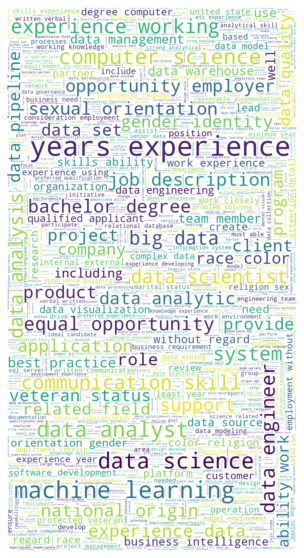

In [39]:
words = " ".join(df['Job Description'])

def punc_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punc_stop(words)
text = " ".join([elem for elem in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS,
               max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()